In [5]:
import pandas as pd
from utils import *

df_drift = pd.read_csv('../data/fraud/PS_20174392719_1491204439457_log.csv')
df_drift  = df_drift[['amount']]

df_train = pd.read_csv('../data/fraud/fraudTrain.csv')
df_train['amount'] = df_train['amt']



In [6]:
def run_eval_ks(df):
    size_of_d = 325000*11
    df = df[:size_of_d]
    reference_data = df[:325000]
    reference_data = reference_data["amount"].tolist()
    test_data_all = df[325000:]
    test_data_all = test_data_all["amount"].tolist()
    ground_truth_vals = []
    bins_vals = []
    digest_vals = []
    chunk_size = 325000
    for i in range(0, len(test_data_all), chunk_size):
        test_data = test_data_all[i:i + chunk_size]
        original_ks = get_original_ks(reference_data, test_data)
        ground_truth_vals.append(original_ks)
        print(f'original ks_score: {original_ks}')
        bins_val = get_bins_ks(reference_data, test_data)
        bins_vals.append(bins_val)
        print(f'Bins KS score: {bins_val}')
        dig_val = get_digest_ks(reference_data, test_data)
        digest_vals.append(dig_val)
        print(f'Digest KS score: {dig_val}')

        print("----------------------------------------------------")

        with open("KS_sudden_drift_supported_results", 'a') as file:
            file.write(f'Iteration:{i} - original ks_score: {original_ks}' + '\n')
            file.write(f'Iteration:{i} - Histogram ks_score: {bins_val}' + '\n')
            file.write(f'Iteration:{i} - T_Digest ks_score: {dig_val}' + '\n')

SUPP_NUMBER = 10
for supp in range(SUPP_NUMBER):
    # shuffle for randomness
    df_train = df_train.sample(frac=1).reset_index(drop=True)
    df_drift = df_drift.sample(frac=1).reset_index(drop=True)

    df = pd.concat([df_train, df_drift], ignore_index=True)
    run_eval_ks(df)

original ks_score: 0.0035384615384615385
Bins KS score: 0.003243076923076923
reference_digest.batch_update(ref_data) took:6.912691116333008 seconds to run.
test_digest.batch_update(ref_data) took:6.819070816040039 seconds to run.
checking the loop took:427.4270484447479 seconds to run.
Digest KS score: 0.0046830769230769564
----------------------------------------------------
original ks_score: 0.004258461538461538
Bins KS score: 0.003756923076923077
reference_digest.batch_update(ref_data) took:7.002065181732178 seconds to run.
test_digest.batch_update(ref_data) took:7.049858093261719 seconds to run.
checking the loop took:861.9679653644562 seconds to run.
Digest KS score: 0.005015385948423934
----------------------------------------------------
original ks_score: 0.010547692307692308
Bins KS score: 0.010495384615384615
reference_digest.batch_update(ref_data) took:18.66187882423401 seconds to run.
test_digest.batch_update(ref_data) took:18.492265462875366 seconds to run.
checking the l

KeyboardInterrupt: 

original ks_score: 0.0033261538461538463
Bins KS score: 0.002963076923076923
reference_digest.batch_update(ref_data) took:6.730542421340942 seconds to run.
test_digest.batch_update(ref_data) took:6.627565622329712 seconds to run.
checking the loop took:705.9870190620422 seconds to run.
Digest KS score: 0.004347449899600675
----------------------------------------------------
original ks_score: 0.0017907692307692308
Bins KS score: 0.0010830769230769231
reference_digest.batch_update(ref_data) took:6.5928733348846436 seconds to run.
test_digest.batch_update(ref_data) took:6.596600770950317 seconds to run.
checking the loop took:424.51806259155273 seconds to run.
Digest KS score: 0.0022585055784508645
----------------------------------------------------
original ks_score: 0.00908
Bins KS score: 0.008676923076923077
reference_digest.batch_update(ref_data) took:9.545287132263184 seconds to run.
test_digest.batch_update(ref_data) took:9.684343338012695 seconds to run.
checking the loop took:5

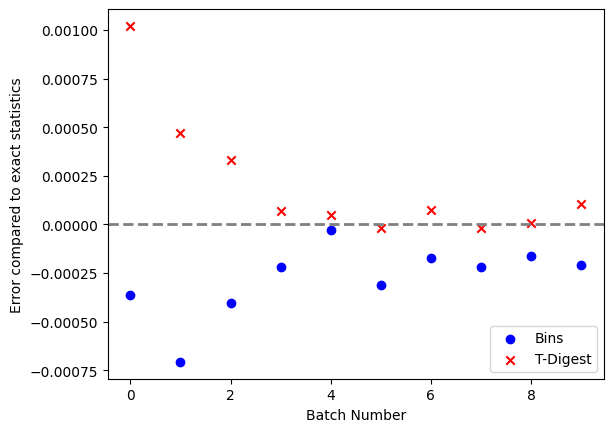

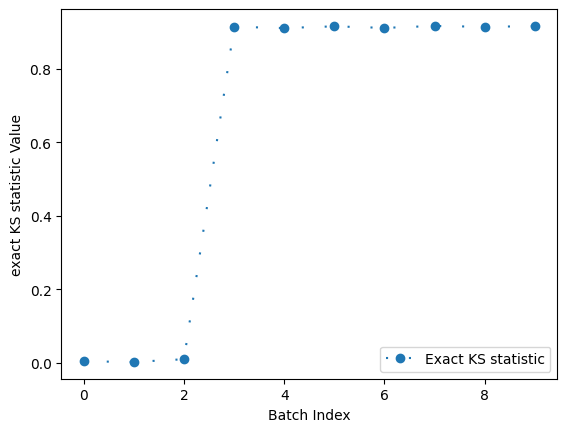

In [25]:

# reference_data = pd.concat([monthly_dfs["2019-01"], monthly_dfs["2019-02"]], ignore_index=True)
size_of_d = 325000*11
df = df[:size_of_d]
reference_data = df[:325000]
reference_data = reference_data["amount"].tolist()
test_data_all = df[325000:]
test_data_all = test_data_all["amount"].tolist()
ground_truth_vals = []
bins_vals = []
digest_vals = []
chunk_size = 325000
for i in range(0, len(test_data_all), chunk_size):
    test_data = test_data_all[i:i + chunk_size]
    original_ks = get_original_ks(reference_data, test_data)
    ground_truth_vals.append(original_ks)
    print(f'original ks_score: {original_ks}')
    bins_val = get_bins_ks(reference_data, test_data)
    bins_vals.append(bins_val)
    print(f'Bins KS score: {bins_val}')
    dig_val = get_digest_ks(reference_data, test_data)
    digest_vals.append(dig_val)
    print(f'Digest KS score: {dig_val}')

    print("----------------------------------------------------")




print(ground_truth_vals)


plot_errors_lines(ground_truth_vals, bins_vals, digest_vals, figure_name="fraud_2_DSs_amount_KS_325k_batches")


plot_exact_KS(ground_truth_vals, figure_name="fraud_2DSs_amount_original_KS")
